# Pima Indians Diabetes Data Analysis

Context: This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [162]:
import pandas as pd
import numpy as np

# Using OSEMN pipeline
df = pd.read_csv('diabetes.csv')
display(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [163]:
# 0 values in the following function - not realistic
indicators = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
df[indicators] = df[indicators].replace(0,np.nan) # Convert to NaN so cleaning is easier

df.isnull().sum()
df.dropna() # Get rid of rows with invalid data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0


In [164]:
df.describe() # Useful stats data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [165]:
df['High Pregnancies'] = df['Pregnancies'] > df.Pregnancies.mean()
df.groupby(['High Pregnancies'])['Outcome'].mean()

High Pregnancies
False    0.266509
True     0.450581
Name: Outcome, dtype: float64

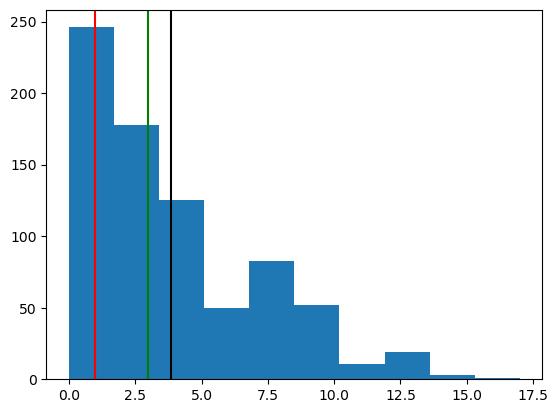

In [166]:
import matplotlib.pyplot as plt

plt.hist(df['Pregnancies'])
plt.axvline(x=df.Pregnancies.mean(), color='black')
plt.axvline(x=df.Pregnancies.mode()[0], color='red')
plt.axvline(x=df.Pregnancies.median(), color='green')

# Right Skew

<Axes: title={'center': 'Pregnancies'}, xlabel='Outcome'>

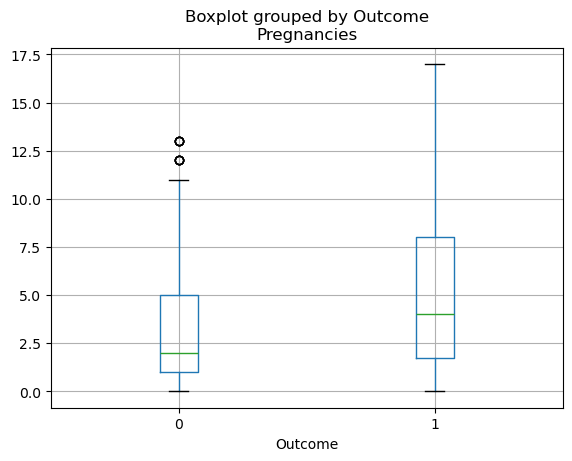

In [167]:
df.boxplot(column='Pregnancies', by='Outcome')

In [168]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_normal = df[['Pregnancies', 'Outcome']].copy()
df_normal[['Pregnancies', 'Outcome']] = scaler.fit_transform(df_normal[['Pregnancies', 'Outcome']])

df_normal['Pregnancies'].corr(df_normal['Outcome'])

np.float64(0.22189815303398672)

In [169]:
df['High Glucose'] = df['Glucose'] > df.Glucose.mean()
df.groupby(['High Glucose'])['Outcome'].mean()

High Glucose
False    0.176471
True     0.562682
Name: Outcome, dtype: float64

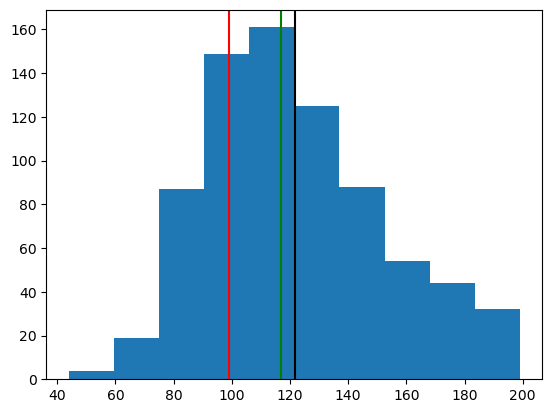

In [170]:
plt.hist(df['Glucose'])
plt.axvline(x=df.Glucose.mean(), color='black')
plt.axvline(x=df.Glucose.mode()[0], color='red')
plt.axvline(x=df.Glucose.median(), color='green')

<Axes: title={'center': 'Glucose'}, xlabel='Outcome'>

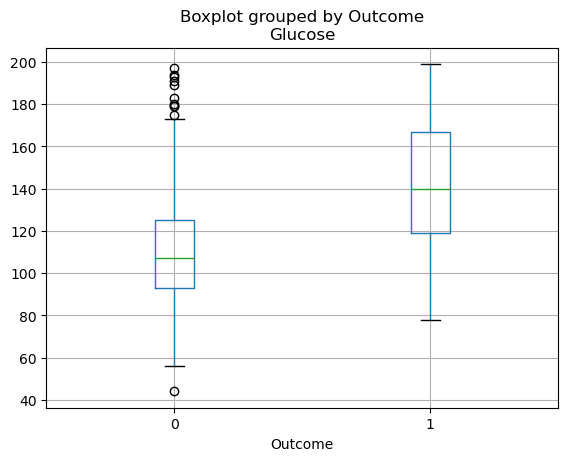

In [171]:
df.boxplot(column='Glucose', by='Outcome')

In [172]:
df['High Blood Pressure'] = df['BloodPressure'] > df.BloodPressure.mean()
df.groupby(['High Blood Pressure'])['Outcome'].mean()

High Blood Pressure
False    0.298329
True     0.409742
Name: Outcome, dtype: float64

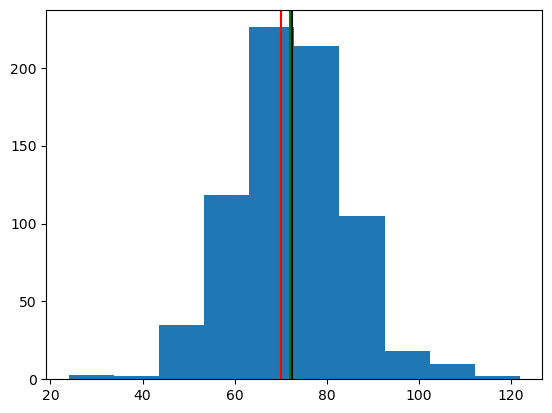

In [173]:
plt.hist(df['BloodPressure'])
plt.axvline(x=df.BloodPressure.mean(), color='black')
plt.axvline(x=df.BloodPressure.mode()[0], color='red')
plt.axvline(x=df.BloodPressure.median(), color='green')

<Axes: title={'center': 'BloodPressure'}, xlabel='Outcome'>

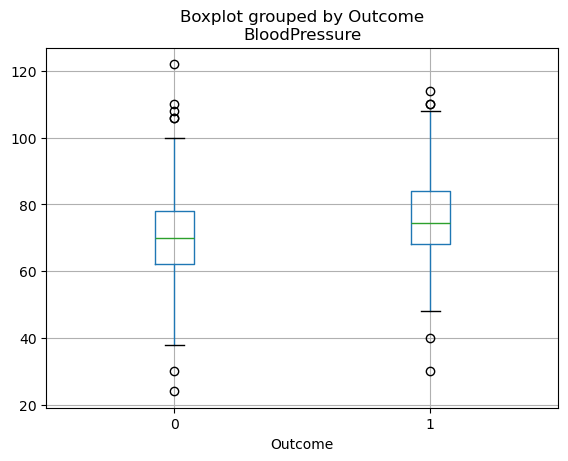

In [174]:
df.boxplot(column='BloodPressure', by='Outcome')

In [175]:
df['High Skin Thickness'] = df['SkinThickness'] > df.SkinThickness.mean()
df.groupby(['High Skin Thickness'])['Outcome'].mean()

High Skin Thickness
False    0.300199
True     0.441509
Name: Outcome, dtype: float64

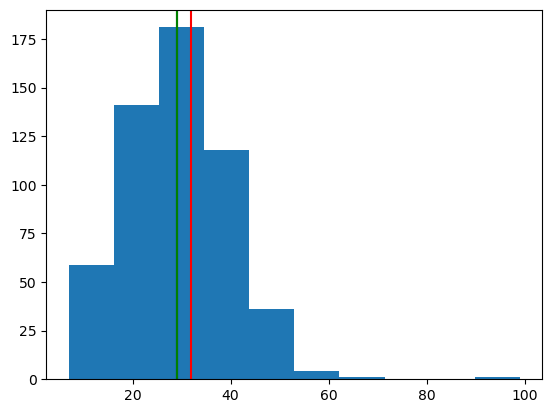

In [176]:
plt.hist(df['SkinThickness'])
plt.axvline(x=df.SkinThickness.mean(), color='black')
plt.axvline(x=df.SkinThickness.mode()[0], color='red')
plt.axvline(x=df.SkinThickness.median(), color='green')

<Axes: title={'center': 'SkinThickness'}, xlabel='Outcome'>

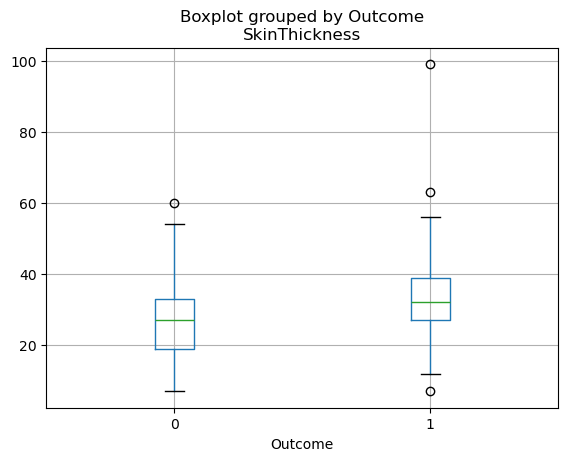

In [177]:
df.boxplot(column='SkinThickness', by='Outcome')

In [178]:
df['High Insulin'] = df['Insulin'] > df.Insulin.mean()
df.groupby(['High Insulin'])['Outcome'].mean()

High Insulin
False    0.307568
True     0.523810
Name: Outcome, dtype: float64

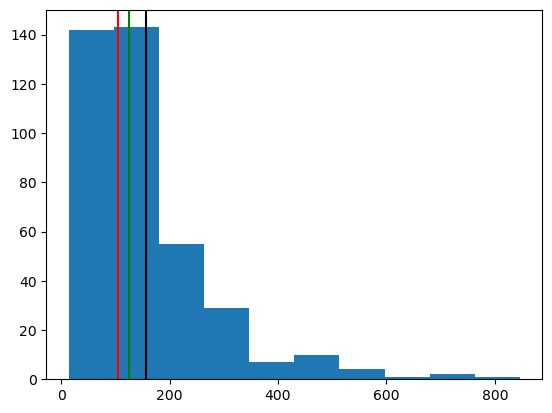

In [179]:
plt.hist(df['Insulin'])
plt.axvline(x=df.Insulin.mean(), color='black')
plt.axvline(x=df.Insulin.mode()[0], color='red')
plt.axvline(x=df.Insulin.median(), color='green')

<Axes: title={'center': 'Insulin'}, xlabel='Outcome'>

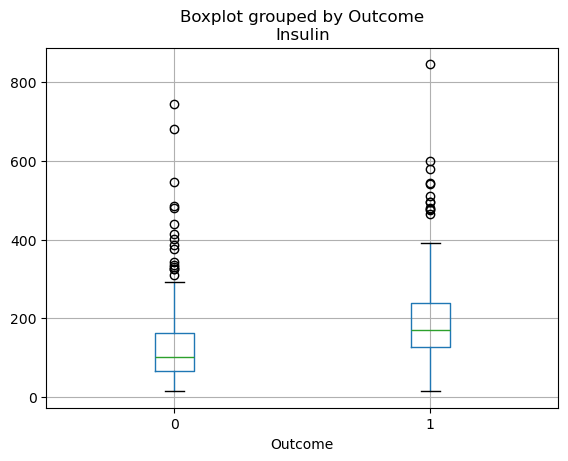

In [180]:
df.boxplot(column='Insulin', by='Outcome')

In [181]:
df['High BMI'] = df['BMI'] > df.BMI.mean()
df.groupby(['High BMI'])['Outcome'].mean()

High BMI
False    0.239401
True     0.468665
Name: Outcome, dtype: float64

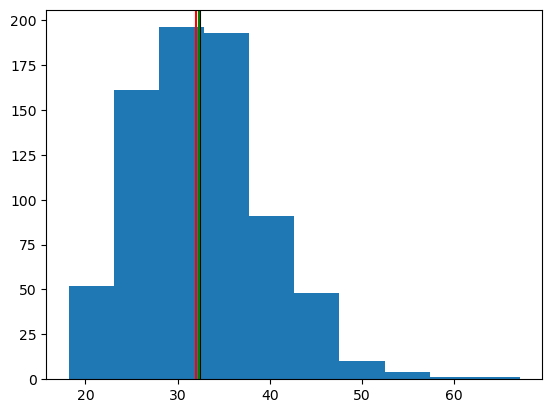

In [182]:
plt.hist(df['BMI'])
plt.axvline(x=df.BMI.mean(), color='black')
plt.axvline(x=df.BMI.mode()[0], color='red')
plt.axvline(x=df.BMI.median(), color='green')

<Axes: title={'center': 'BMI'}, xlabel='Outcome'>

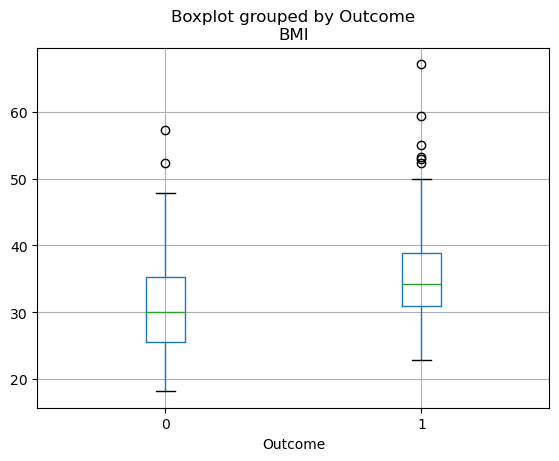

In [183]:
df.boxplot(column='BMI', by='Outcome')

In [184]:
df['High Diabetes Pedigree'] = df['DiabetesPedigreeFunction'] > df.DiabetesPedigreeFunction.mean()
df.groupby(['High Diabetes Pedigree'])['Outcome'].mean()

High Diabetes Pedigree
False    0.293869
True     0.437288
Name: Outcome, dtype: float64

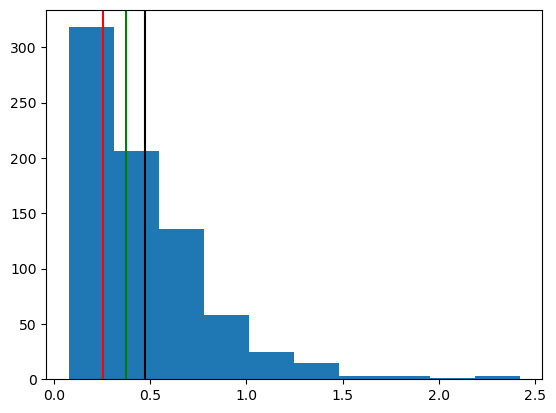

In [185]:
plt.hist(df['DiabetesPedigreeFunction'])
plt.axvline(x=df.DiabetesPedigreeFunction.mean(), color='black')
plt.axvline(x=df.DiabetesPedigreeFunction.mode()[0], color='red')
plt.axvline(x=df.DiabetesPedigreeFunction.median(), color='green')

<Axes: title={'center': 'DiabetesPedigreeFunction'}, xlabel='Outcome'>

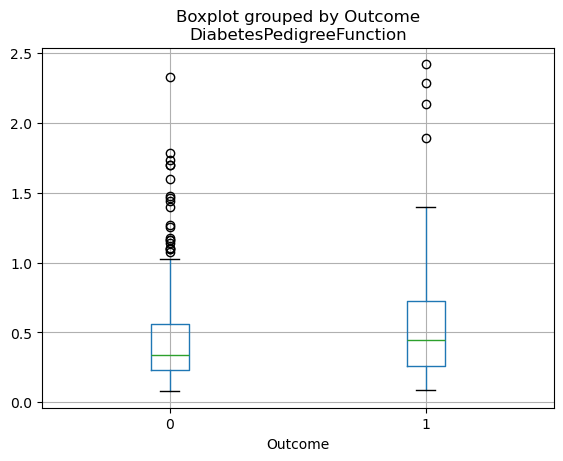

In [186]:
df.boxplot(column='DiabetesPedigreeFunction', by='Outcome')

In [187]:
df['High Age'] = df['Age'] > df.Age.mean()
df.groupby(['High Age'])['Outcome'].mean()

High Age
False    0.257384
True     0.496599
Name: Outcome, dtype: float64

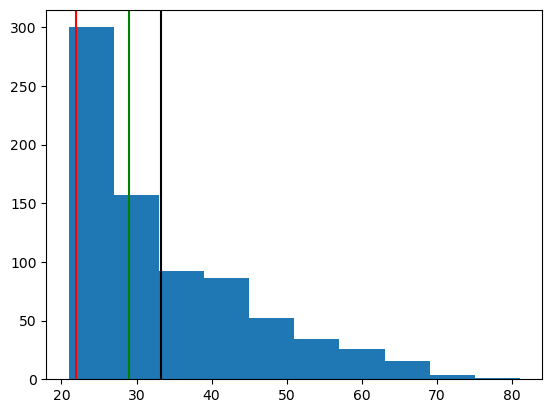

In [188]:
plt.hist(df['Age'])
plt.axvline(x=df.Age.mean(), color='black')
plt.axvline(x=df.Age.mode()[0], color='red')
plt.axvline(x=df.Age.median(), color='green')

<Axes: title={'center': 'Age'}, xlabel='Outcome'>

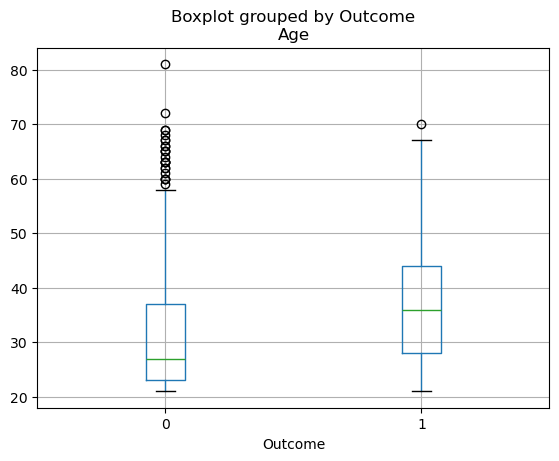

In [189]:
df.boxplot(column='Age', by='Outcome')

C:\Users\HKARA\AppData\Local\Temp\ipykernel_7572\2797713639.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
C:\Users\HKARA\AppData\Local\Temp\ipykernel_7572\2797713639.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

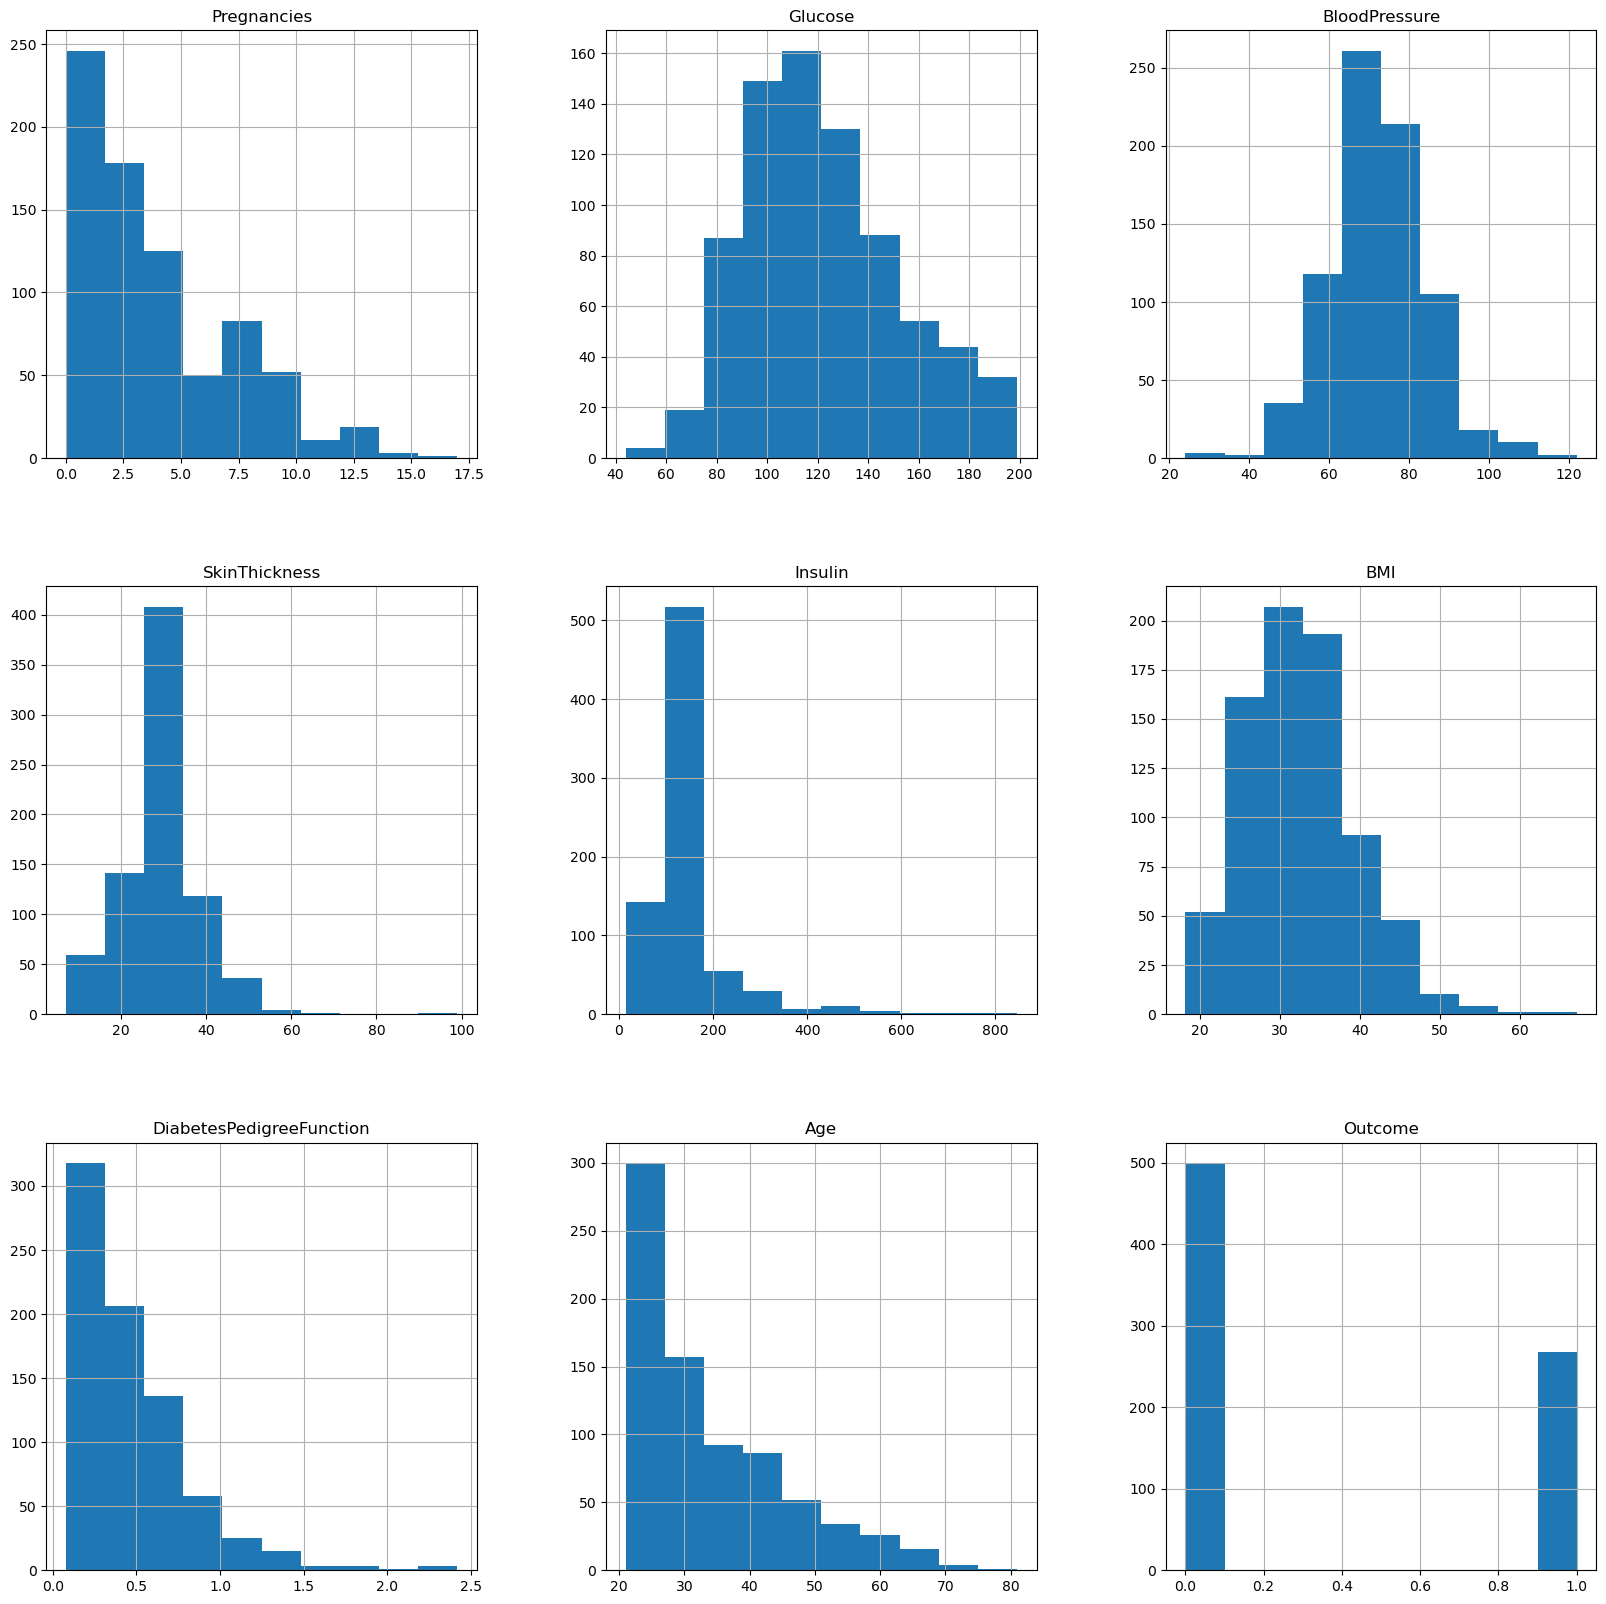

In [ ]:
# Generate histograms on one plot for all indicators from copied df
df_copy = df.copy(deep = True)
df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']] = df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']].replace(0,np.nan)

df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

hist_dist = df_copy.hist(figsize=(20,20))